## Predicting employee retention/turnover 
> Cecelia Shao

> **General Assembly Final Project**

> Binary Classification problem (Predict Attrition - Yes/No)

### Important Links
- https://www.kaggle.com/boyanangelov/predict-employee-retention-hr-analytics

In [1]:
### Import Libraries + Packages ###

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics

%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

In [2]:
### Read in csv data ###
df = pd.read_csv('../final_project_employee/hr_data.csv')

In [3]:
### Take a first look at some of the columns! ###

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# See columns and count for the data provided 
# check for null values
df.isnull().sum()
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [5]:
### Reviewing data types - consider dummy variables ### 
# consider converting object type fields to dummy variables 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Data Dictionary

#### Note: aata is from the Kaggle website: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Also a great opportunity to look at the features of the data! 

- determine what to drop (some compensation variables and also Over18, plus EmployeeCount which is just 1 

#### Employee Personal Information
Variable | Description | Type of Variable | Transformation?
---| ---| ---
Age   | employee's age | int64 | none
Attrition  | Target variable of interest  | object | binary, needs to be dummified
DistanceFromHome   | commute distance |   int64 | No transformation needed 
Education   | Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'  | int64 | No transformation needed 
EducationField   | degree major |  object | needs to be dummified 
EmployeeNumber   | employee number, unique ID of sorts | int64 | No transformation needed 
Gender   | male or female |   object | needs to be dummified
MaritalStatus   | marital status,  |    object | needs to be dummified
Over18   | Y/N to employee being over 18 years of age |    object | Not meaningful since all employees considered are over18, will drop


#### Job Demands 
Variable | Description | Type of Variable | Transformation?
---| ---| ---
Department   | department at the company |   object | needs to be dummified
BusinessTravel| Description of whether or not an employee travels frequently | object | needs to be dummified
JobInvolvement   | level of involvement |    int64
JobLevel   | rank of the employee's position |   int64 | no transformation needed
JobRole    | job role |   object | needs to be dummified
OverTime    | Y/N on whether the employee works overtime |  object| binary, needs to be dummified
StandardHours   | unclear, will probably drop from the dataset bc of ambiguity |   int64 | no transformation needed


#### Compensation
Variable | Description | Type of Variable | Transformation?
---| ---| --- 
DailyRate  | pay for a day | int64 | no transformation needed
HourlyRate    | pay for an hour |    int64 | no transformation needed
MonthlyIncome   | income for a month |    int64 | no transformation needed
MonthlyRate    | income for a month, is a duplicate on MonthlyIncome  |    int64| no transformation needed
PercentSalaryHike   | % for a salary increase (unclear what time period and what point of reference is or whether this rate is liable to change (could express the most recent salary hike increase) |  int64 | no transformation needed
StockOptionLevel   |  amount of stock options employee has (scale unknown) |   int64 | no transformation needed


#### Employee Ratings
Variable | Description | Type of Variable | Transformation?
---| ---| ---
EnvironmentSatisfaction   | 1 'Low' 2 'Medium' 3 'High' 4 'Very High' |  int64  | no transformation needed
JobSatisfaction    | 1 'Low' 2 'Medium' 3 'High' 4 'Very High' |   int64| no transformation needed
PerformanceRating    | 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding' |   int64| no transformation needed
RelationshipSatisfaction  | 1 'Low' 2 'Medium' 3 'High' 4 'Very High' |  int64| no transformation needed
WorkLifeBalance   |  1 'Bad' 2 'Good' 3 'Better' 4 'Best' | int64| no transformation needed

#### Employee Experience 
Variable | Description | Type of Variable | Transformation?
---| ---| ---
NumCompaniesWorked   | number of companies employee has worked at before | int64 | no transformation needed
TotalWorkingYears    | total working years | int64 | no transformation needed
TrainingTimesLastYear   | number of training sessions (or hours? Unclear) | int64 | no transformation needed
YearsAtCompany    | employee's tenure at the company  | int64 | no transformation needed
YearsInCurrentRole   | years in current role | int64 | no transformation needed
YearsSinceLastPromotion   | years since last promotion |   int64 | no transformation needed
YearsWithCurrManager   | years with current manager | int64 | no transformation needed


In [6]:
### Review descriptive statistics ###

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
### Confirm that everyone is Over18, can drop variables ###

df.loc[df['Over18'] == 'Y'].count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

## Continued EDA - evaluating distribution & variable correlation

### Visualizations
- scatterplot
- box plots 
- histogram distribution
- correlation matrix

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

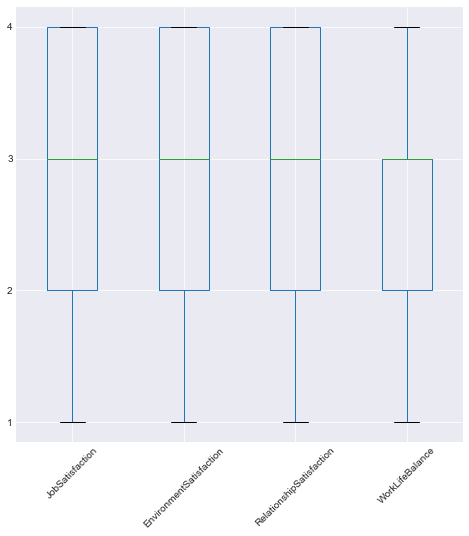

In [69]:
### Box Plot ###

from matplotlib.ticker import MaxNLocator
ax = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
         'WorkLifeBalance']].plot(kind='box', figsize=(8,8));
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)

# https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

In [10]:
### Take a closer look at employee rating variables  ###

df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
         'WorkLifeBalance']].describe().T.style

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,1470,2.72857,1.10285,1,2,3,4,4
EnvironmentSatisfaction,1470,2.72177,1.09308,1,2,3,4,4
RelationshipSatisfaction,1470,2.71224,1.08121,1,2,3,4,4
WorkLifeBalance,1470,2.76122,0.706476,1,2,3,3,4


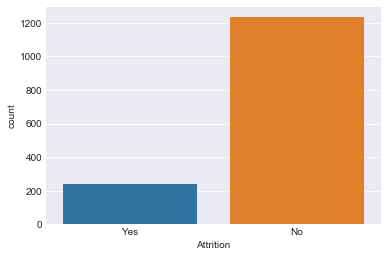

In [11]:
### Sign of skewed data - so few Yes's/1's ###


# df[['Attrition']].hist(color='blue', grid=False, edgecolor='#000000')
sns.countplot(df.Attrition);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f7c9050>]], dtype=object)

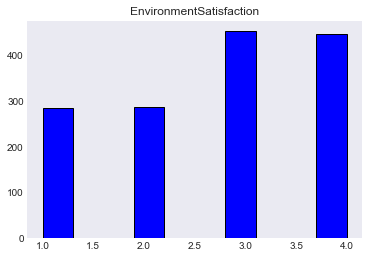

In [12]:
df[['EnvironmentSatisfaction']].hist(color='blue', grid=False, edgecolor='#000000')

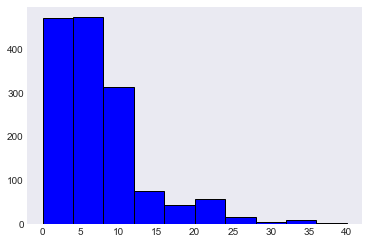

In [13]:
df['YearsAtCompany'].hist(color='blue', grid=False, edgecolor='#000000')

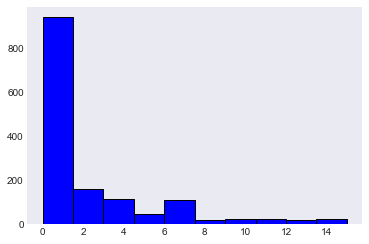

In [14]:
df['YearsSinceLastPromotion'].hist(color='blue', grid=False, edgecolor='#000000')

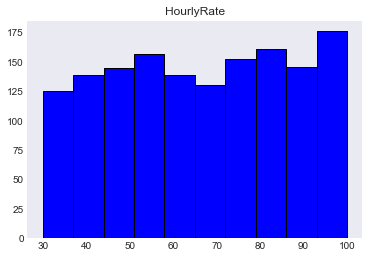

In [15]:
df[['HourlyRate']].hist(color='blue', grid=False, edgecolor='#000000');

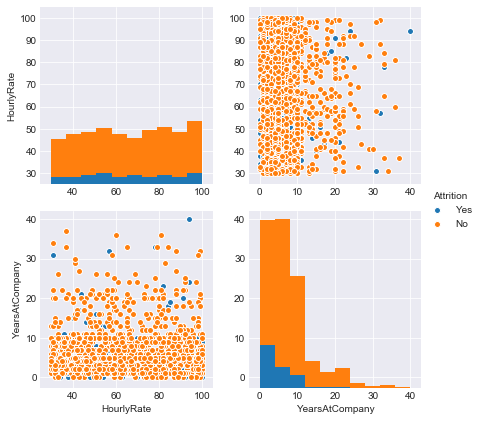

In [16]:
sns.pairplot(df, hue='Attrition', x_vars=["HourlyRate", "YearsAtCompany"],
             y_vars=["HourlyRate", "YearsAtCompany"], size=3);

# https://stackoverflow.com/questions/43482446/python-scatter-plot-different-colors-depending-on-value
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

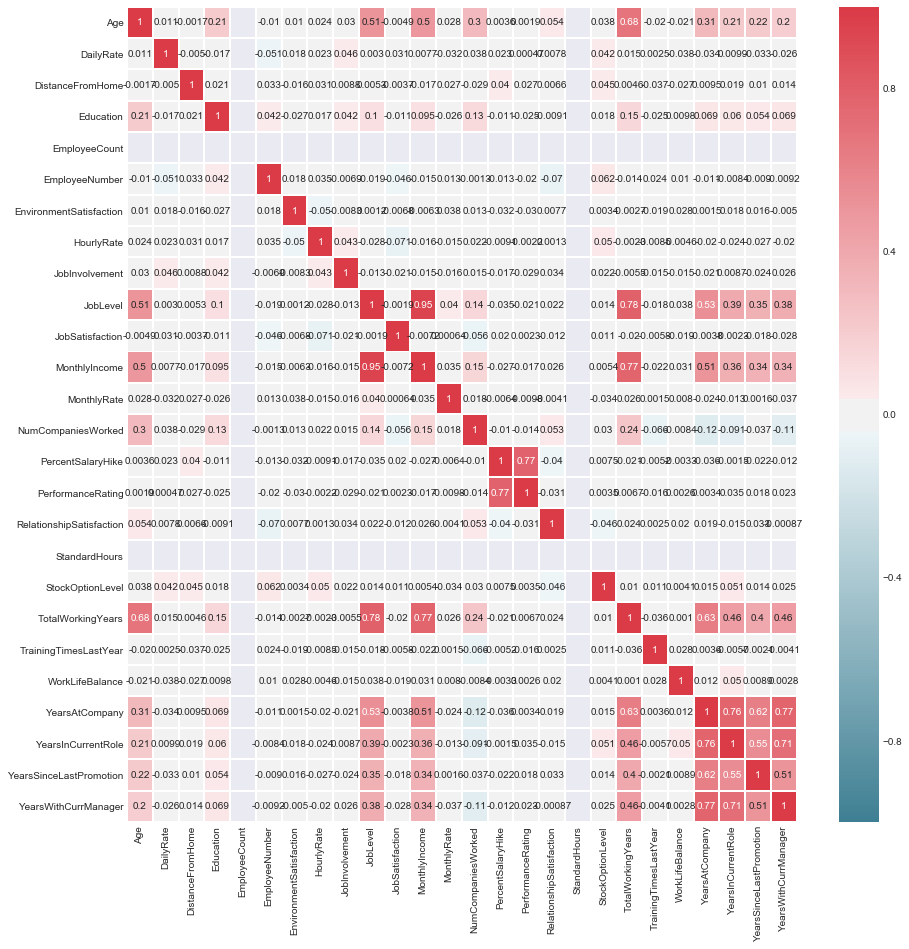

In [17]:
### Correlation Matrix - identify colinearity among variables ###
 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df.corr()
print(correlations)

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlations, cmap=cmap, vmin=-1, vmax=1, annot=True, linewidths=1.0, ax=ax)

# Alternative correlation matrix with matplotlib
# plt.matshow(df.corr())

# Make the figure size bigger
# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

In [18]:
### Quick check of ranked correaltions ###
os = (df.corr().abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print os

## identifying the most highly correlated features (minus duplicates where there is a perfect correlation since they're the same variable)
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas


JobLevel                  MonthlyIncome               0.950300
                          TotalWorkingYears           0.782208
PercentSalaryHike         PerformanceRating           0.773550
MonthlyIncome             TotalWorkingYears           0.772893
YearsAtCompany            YearsWithCurrManager        0.769212
                          YearsInCurrentRole          0.758754
YearsInCurrentRole        YearsWithCurrManager        0.714365
Age                       TotalWorkingYears           0.680381
TotalWorkingYears         YearsAtCompany              0.628133
YearsAtCompany            YearsSinceLastPromotion     0.618409
YearsInCurrentRole        YearsSinceLastPromotion     0.548056
JobLevel                  YearsAtCompany              0.534739
MonthlyIncome             YearsAtCompany              0.514285
YearsSinceLastPromotion   YearsWithCurrManager        0.510224
Age                       JobLevel                    0.509604
                          MonthlyIncome               0

In [19]:
## Dropping certain columns/features since they contain N/A values or information is duplicated by other columns
## Just leave HourlyRate for Employee Compensation

## Commenting out these cells since they can only be run once
df.drop(['EmployeeCount','StandardHours', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', ],  axis=1, inplace=True)
df.drop(['Over18'],  axis=1, inplace=True)

### Dummifying variables that are objects

In [20]:
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
df.dtypes
#BusinessTravel              object
#Department                  object
#EducationField              object
#Gender                      object/binary
#JobRole                     object
#MaritalStatus               object
#OverTime                    object

df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [21]:
# Identify the unique values for the different features that are categorical/objects
strings = df.select_dtypes(include=['object'],exclude=None)

for col in strings:
    print col, strings[col].unique(), "\n"

Attrition ['Yes' 'No'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department ['Sales' 'Research & Development' 'Human Resources'] 

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender ['Female' 'Male'] 

JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus ['Single' 'Married' 'Divorced'] 

Over18 ['Y'] 

OverTime ['Yes' 'No'] 



In [22]:
# 28 dummy variables needed 

# dummy variables for BusinessTravel
biztravel = pd.get_dummies(df.BusinessTravel, prefix ='biztravel')
model_data = df.join(biztravel[['biztravel_Non-Travel', 'biztravel_Travel_Rarely', 
                                'biztravel_Travel_Frequently']])

# drop the original column
model_data.drop(['BusinessTravel'], 1, inplace=True)
# check to see if it dropped successfully via model_data.head()

In [23]:
# checking that the biztravel dummy variables were made properly
print model_data.head()

   Age Attrition  DailyRate              Department  DistanceFromHome  \
0   41       Yes       1102                   Sales                 1   
1   49        No        279  Research & Development                 8   
2   37       Yes       1373  Research & Development                 2   
3   33        No       1392  Research & Development                 3   
4   27        No        591  Research & Development                 2   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   
1          1  Life Sciences              1               2   
2          2          Other              1               4   
3          4  Life Sciences              1               5   
4          1        Medical              1               7   

   EnvironmentSatisfaction             ...              TotalWorkingYears  \
0                        2             ...                              8   
1                        3        

In [24]:
model_data.Department.replace({'Research & Development': 'RD', 'Human Resources': 'HR'}, inplace=True)

In [25]:
# dummy variables for Department
dept = pd.get_dummies(model_data.Department, prefix ='dept')
model_data2 = model_data.join(dept[['dept_Sales','dept_RD','dept_HR']])
model_data2.drop(['Department'], 1, inplace=True)

In [26]:
### Dummy variables for EducationField ###

# EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree', Human Resources'] 

model_data2.EducationField.replace({'Life Sciences': 'LifeSci', 'Technical Degree': 'Technical', \
                                    'Human Resources':'HR'}, inplace=True)

degree = pd.get_dummies(model_data2.EducationField, prefix ='degree')
model_data3 = model_data2.join(degree[['degree_LifeSci','degree_Other','degree_Medical','degree_Marketing',\
                                       'degree_Technical','degree_HR']])
model_data3.drop(['EducationField'], 1, inplace=True)


In [27]:
### Dummy variables for Gender ###

# Gender ['Female' 'Male'] 

gender = pd.get_dummies(model_data3.Gender, prefix ='gender')
model_data4 = model_data3.join(gender[['gender_Female','gender_Male']])
model_data4.drop(['Gender'], 1, inplace=True)

In [28]:
### Dummy variables for JobRole ###

# JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
# 'Manufacturing Director' 'Healthcare Representative' 'Manager'
# 'Sales Representative' 'Research Director' 'Human Resources'] 


model_data4.JobRole.replace({'Sales Executive': 'SalesExec', 'Research Scientist': 'ResearchSci', \
                             'Laboratory Technician':'LabTech', 'Manufacturing Director':'ManuDirector', \
                             'Healthcare Representative':'HealthcareRep','Sales Representative':'SalesRep', \
                             'Research Director':'ResearchDirector', 'Human Resources':'HR' }, inplace=True)

In [29]:
jobrole = pd.get_dummies(model_data4.JobRole, prefix ='jobrole')
model_data5 = model_data4.join(jobrole[['jobrole_SalesExec','jobrole_ResearchSci','jobrole_LabTech','jobrole_ManuDirector',\
                                       'jobrole_HealthcareRep', 'jobrole_SalesRep', 'jobrole_ResearchDirector', 'jobrole_HR']])
model_data5.drop(['JobRole'], 1, inplace=True)

In [30]:
### Dummy variables for MaritalStatus ###
# MaritalStatus ['Single' 'Married' 'Divorced']

ms = pd.get_dummies(model_data5.MaritalStatus, prefix ='ms')
model_data6 = model_data5.join(ms[['ms_Single','ms_Married', 'ms_Divorced']])
model_data6.drop(['MaritalStatus'], 1, inplace=True)

In [31]:
# Converting Yes/No Values in Attribution and OverTime column to 1's and 0's
# https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

model_data6['Attrition']= model_data6['Attrition'].map({'No': 0, 'Yes': 1})
model_data6['OverTime']= model_data6['OverTime'].map({'No': 0, 'Yes': 1})
model_data6.drop(['Over18'], axis=1, inplace=True)

final_data = model_data6

final_data.head()
final_data.get_dtype_counts()

int64    28
uint8    25
dtype: int64

In [32]:
# checking the types of the final dataset to confirm there are no objects or strange types 
final_floats = final_data.select_dtypes(include=['object'], exclude=None)

print final_floats

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1470 rows x 0 columns]


In [33]:
final_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,jobrole_ResearchSci,jobrole_LabTech,jobrole_ManuDirector,jobrole_HealthcareRep,jobrole_SalesRep,jobrole_ResearchDirector,jobrole_HR,ms_Single,ms_Married,ms_Divorced
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,0,0,1,0,0
1,49,0,279,8,1,1,2,3,61,2,...,1,0,0,0,0,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,1,0,0,0,0,0,1,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,1,0,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,...,0,1,0,0,0,0,0,0,1,0


In [34]:
cols = final_data.columns.tolist()
cols

# df = df[cols]
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'biztravel_Non-Travel',
 'biztravel_Travel_Rarely',
 'biztravel_Travel_Frequently',
 'dept_Sales',
 'dept_RD',
 'dept_HR',
 'degree_LifeSci',
 'degree_Other',
 'degree_Medical',
 'degree_Marketing',
 'degree_Technical',
 'degree_HR',
 'gender_Female',
 'gender_Male',
 'jobrole_SalesExec',
 'jobrole_ResearchSci',
 'jobrole_LabTech',
 'jobrole_ManuDirector',
 'jobrole_HealthcareRep',
 'jobrole_SalesRep',
 'jobrole_ResearchDirector',
 'jobrole_HR',
 

## Modeling

- Multilinear Regression requires normal distribution of data (lmplot) // might have to log transform data

- random forest (ensemble of decision trees)
> https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991
> https://github.com/ga-students/DAT-NYC-1.16.18/tree/master/lessons/12%20-%20Decision%20Trees%20and%20Random%20Forests


- cross validation since data set is small - 5 kfolds 
- gradient boosting 

> https://github.com/ga-students/DAT-NYC-1.16.18/tree/master/lessons/07-evaluating-model-fit

https://github.com/ga-students/DAT-NYC-1.16.18/tree/master/lessons/12%20-%20Decision%20Trees%20and%20Random%20Forests


## Decision Tree classifier models

In [37]:
# Import the DecisionTree Classifer from scikit's tree module
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [38]:
# adjust order of the columns to easily set feature (X) and target (Y) variables 
# final_data[[final_data.columns[0], final_data.columns[1]]] = final_data[[final_data.columns[1], final_data.columns[0]]]
# final_data.rename(index={0: 'Attrition'}, inplace=True)

cols = final_data.columns.tolist()
cols

final_data = final_data [['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'biztravel_Non-Travel',
 'biztravel_Travel_Rarely',
 'biztravel_Travel_Frequently',
 'dept_Sales',
 'dept_RD',
 'dept_HR',
 'degree_LifeSci',
 'degree_Other',
 'degree_Medical',
 'degree_Marketing',
 'degree_Technical',
 'degree_HR',
 'gender_Female',
 'gender_Male',
 'jobrole_SalesExec',
 'jobrole_ResearchSci',
 'jobrole_LabTech',
 'jobrole_ManuDirector',
 'jobrole_HealthcareRep',
 'jobrole_SalesRep',
 'jobrole_ResearchDirector',
 'jobrole_HR',
 'ms_Single',
 'ms_Married',
 'ms_Divorced']]

# confirm that Attrition is the first column
final_data.head()
# https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,jobrole_ResearchSci,jobrole_LabTech,jobrole_ManuDirector,jobrole_HealthcareRep,jobrole_SalesRep,jobrole_ResearchDirector,jobrole_HR,ms_Single,ms_Married,ms_Divorced
0,1,41,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,0,0,1,0,0
1,0,49,279,8,1,1,2,3,61,2,...,1,0,0,0,0,0,0,0,1,0
2,1,37,1373,2,2,1,4,4,92,2,...,0,1,0,0,0,0,0,1,0,0
3,0,33,1392,3,4,1,5,4,56,3,...,1,0,0,0,0,0,0,0,1,0
4,0,27,591,2,1,1,7,1,40,3,...,0,1,0,0,0,0,0,0,1,0


In [39]:
# set feature (X) and target (Y) variables 
X = final_data.drop('Attrition', axis=1)

# Set your target variable 
y = final_data.Attrition

In [40]:
# Split the data into training and test data 
# http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [41]:
# setting attributes of the decision tree classifier model
# random_state and class_weight is defined above in previous cells 
# attrition_modelDTC = DTreeModel(criterion= 'gini', max_depth = None, max_features = None)

attrition_modelDTC = DecisionTreeClassifier(criterion= 'gini', max_depth = None,\
                                            max_features = None, class_weight='balanced')

In [42]:
attrition_modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
attrition_modelDTC2 = DecisionTreeClassifier(criterion= 'gini', max_depth = None,\
                                            max_features = None, class_weight='balanced', min_samples_split=4)

In [44]:
attrition_modelDTC2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Evaluate the decision tree we just created using cross-validation; use AUC as the evaluation metric.

In [45]:
from sklearn.model_selection import cross_val_score

# dtc is the estimator or the object to used to fit the data.
# X is your features, y is your target. You then select a scoring method - here we choose area under the curve as the evaluation metric. 
# alternative scoring methods are: http://scikit-learn.org/stable/modules/model_evaluation.html

# cv: the number of folds (default is 3)

# `cross_val_score` can be over the whole thing as it’s splitting the data, 
# fitting a model and computing the score n consecutive times with different splits.

scores = cross_val_score(attrition_modelDTC, X, y , scoring='roc_auc', cv=5)
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))


### MODEL ACCURACY RESULTS ###
# CV AUC [ 0.54921559  0.62069838  0.63735033  0.55448884  0.54540737], 
# Average AUC 0.581432102196


CV AUC [ 0.58046559  0.59784076  0.6424326   0.60876146  0.56011071], 
Average AUC 0.597922221125


In [46]:
# testing with the second iteration of the model with min_samples_split=4 instead of 2
scores = cross_val_score(attrition_modelDTC2, X, y , scoring='roc_auc', cv=5)
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))


### MODEL ACCURACY RESULTS ###
# CV AUC [ 0.58198381  0.58088731  0.66913602  0.58549559  0.55686732], 
# Average AUC 0.594874009652

CV AUC [ 0.57582659  0.61968623  0.66017745  0.56227296  0.54039094], 
Average AUC 0.591670833605


In [47]:
# Helper function to visualize Decision Trees (creates a file tree.png)
from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(attrition_modelDTC, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(attrition_modelDTC)

In [48]:
# getting subset of rows 
graph_X = X[:200]
graph_y = y[:200]

In [49]:
# checking shape of the resulting subset 
print(graph_X.shape)
print(graph_y.shape)

(200, 52)
(200,)


In [50]:
# fitting the subset of data to the decision tree model
attrition_modelDTC.fit(graph_X, graph_y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

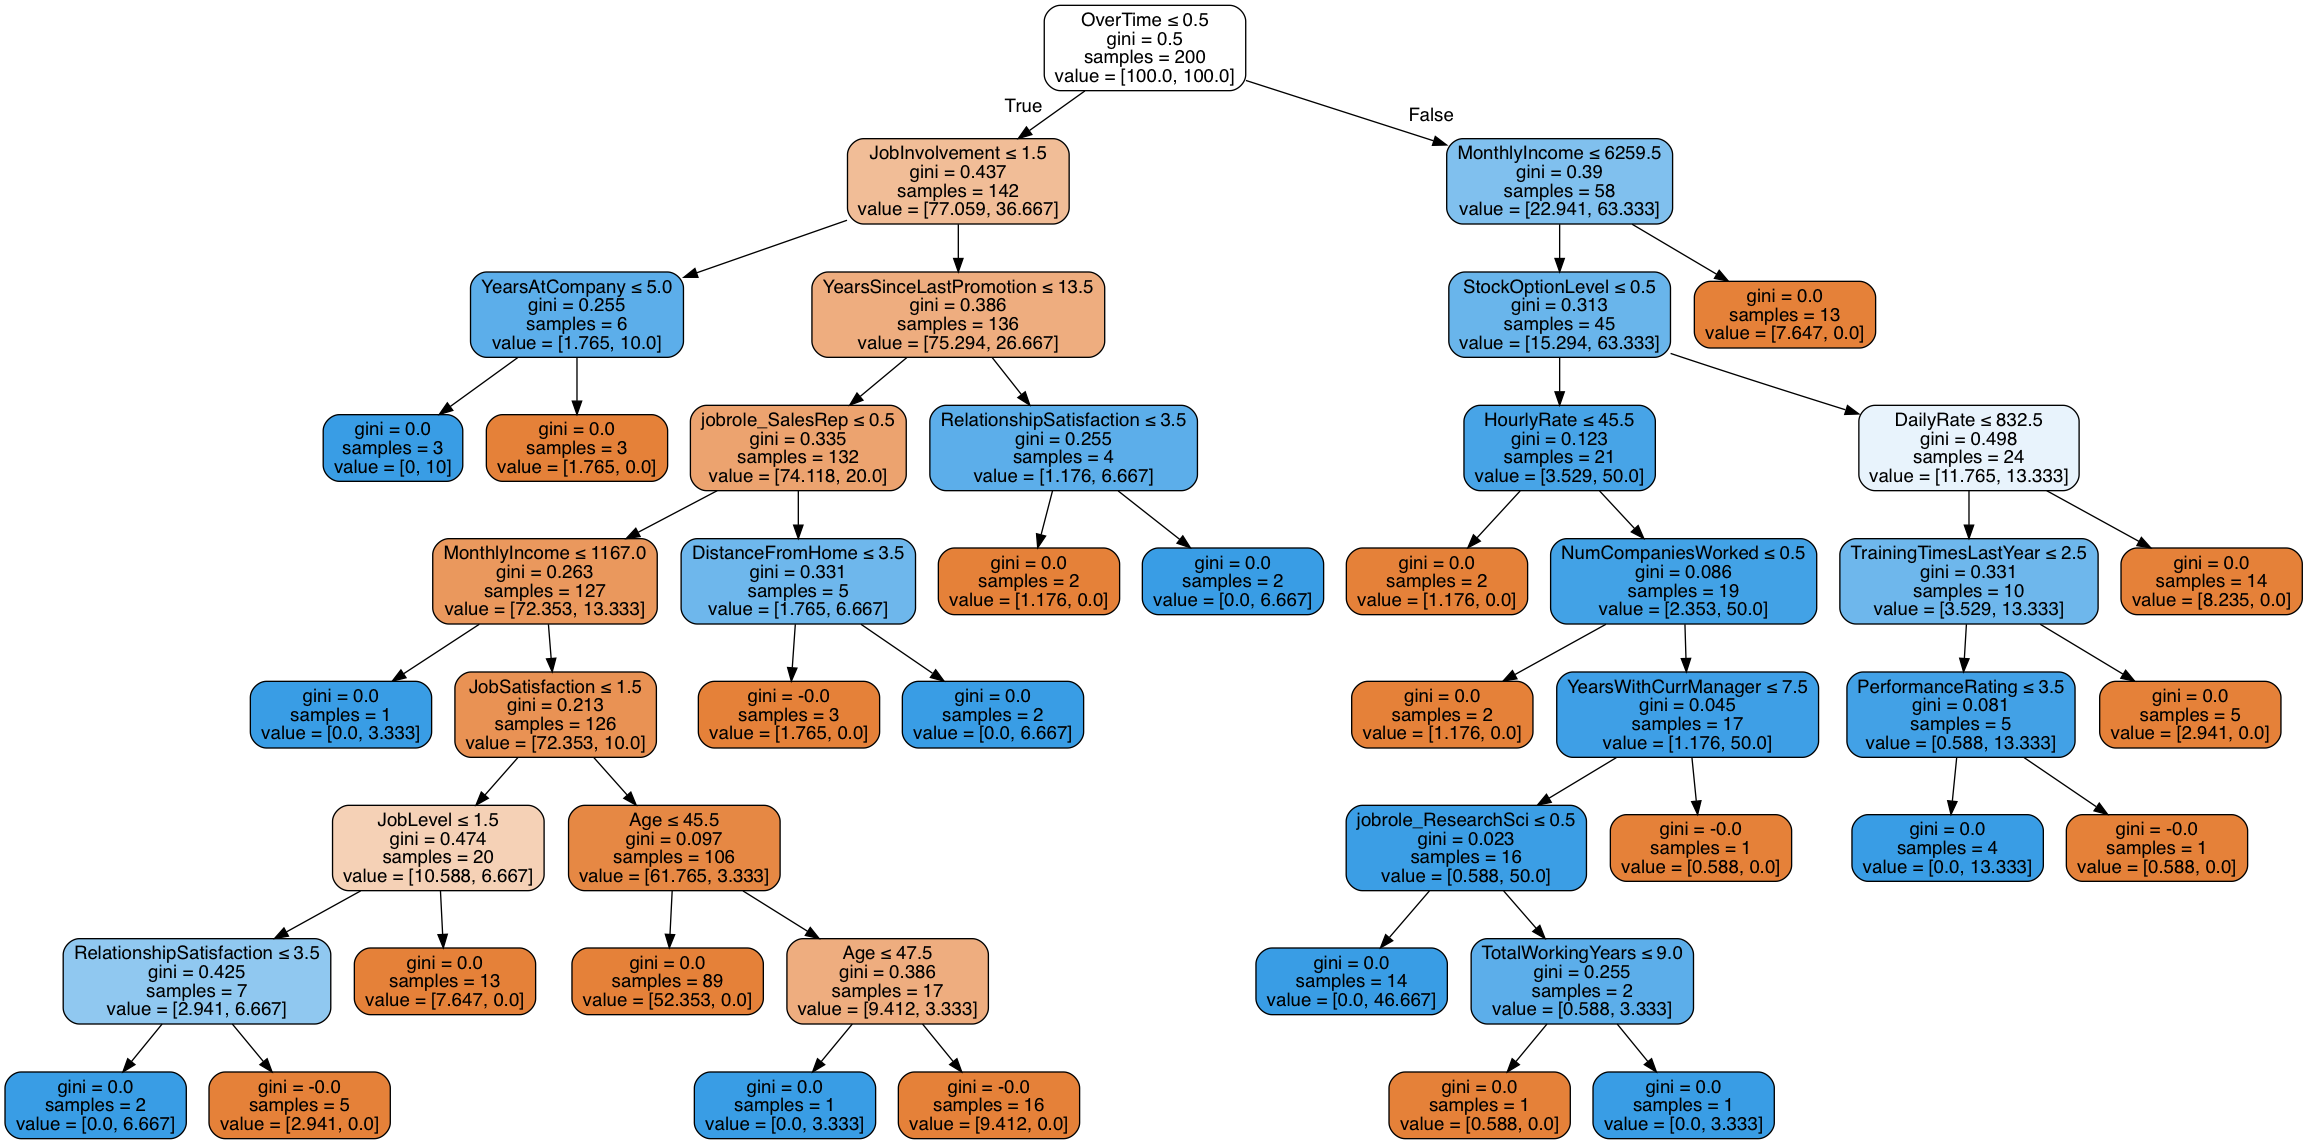

In [51]:
# visualizing the decision tree 
dot_data = tree.export_graphviz(attrition_modelDTC, out_file=None, feature_names=X.columns,
                                filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

###  Tuning the Decision Tree Classifier hyperparameters using GridsearchCV

In [52]:
## Using a function to test different combinations of hyperparameters + addressing potential model overfitting

# Import GridSearchCV from sklearn's model selection library
from sklearn.model_selection import GridSearchCV

print('Processing GridSearch. Please hold for the next available set of outputs.\n')
dtc_parameters = {"criterion": ('gini','entropy'),
                  "max_depth": [2,3,4,5,6,7,8,9,10,11,12],
                  "class_weight": ('balanced', None),
                  "min_samples_split": [2,3,4,5,6],
                  "min_samples_leaf": [1,2,3,4,5],
                  "max_features": (4,5,6, 7,"sqrt")}

DTreeModel = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(DTreeModel, dtc_parameters, n_jobs = -1, cv = 10)
model.fit(X,y)

model.best_params_
# print(gd_model.best_estimator_)
# model.best_estimator_

Processing GridSearch. Please hold for the next available set of outputs.



{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [53]:
# testing out the best parameters computed by gridsearch
attrition_modelDTCGRID = DecisionTreeClassifier(class_weight= None,criterion='entropy',max_depth= 3, \
                                                max_features= 6,min_samples_leaf= 1,min_samples_split= 2)

In [54]:
attrition_modelDTCGRID.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
# testing with the second iteration of the model with min_samples_split=4 instead of 2
scores = cross_val_score(attrition_modelDTCGRID, X, y , scoring='roc_auc', cv=5)
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))


### MODEL ACCURACY RESULTS ###
# CV AUC [ 0.56743421  0.7076164   0.6638384   0.716831    0.74039958], 
# Average AUC 0.679223918294

CV AUC [ 0.69374157  0.62272267  0.6258937   0.68547829  0.75090815], 
Average AUC 0.675748875802


## Decision Tree Model Accuracy Summary

### First Decision Tree Model - `attrition_modelDTC`
> PARAMETERS: DecisionTreeClassifier(class_weight='balanced', criterion='gini',
>            max_depth=None, max_features=None, max_leaf_nodes=None,
>            min_impurity_decrease=0.0, min_impurity_split=None,
>            min_samples_leaf=1, min_samples_split=2,
>            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
>            splitter='best')

> **CV AUC [ 0.54921559  0.62069838  0.63735033  0.55448884  0.54540737],** 

>  **Average AUC 0.581432102196**


### Second Decision Tree Model - `attrition_modelDTC2`
Adjustment was to change the parameter `min_samples_split` from 2 to 4
> PARAMETERS: DecisionTreeClassifier(class_weight='balanced', criterion='gini',
>            max_depth=None, max_features=None, max_leaf_nodes=None,
>            min_impurity_decrease=0.0, min_impurity_split=None,
>            min_samples_leaf=1, min_samples_split=4,
>            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
>            splitter='best')

> **CV AUC [ 0.58198381  0.58088731  0.66913602  0.58549559  0.55686732],**

>  **Average AUC 0.594874009652 **


### Third Decision Tree Model - `attrition_modelDTCGRID`
Adjustment was testing with gridsearch for the best parameters and using those parameters
> DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
>            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
>            min_impurity_split=None, min_samples_leaf=1,
>            min_samples_split=2, min_weight_fraction_leaf=0.0,
>            presort=False, random_state=None, splitter='best')

> **CV AUC [ 0.56743421  0.7076164   0.6638384   0.716831    0.74039958], **

> **Average AUC 0.679223918294**

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_preds = attrition_modelDTCGRID.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [57]:
accuracy = accuracy_score(y_test, y_preds)
print ('My accuracy score is', accuracy)
# confusion matrix shows model is only predicting 0s - perhaps we should adjust the threshold
confmat = confusion_matrix(y_test, y_preds)
confmat

('My accuracy score is', 0.85941043083900226)


array([[379,   1],
       [ 61,   0]])

In [58]:
# Introduce better formatting for the confusion matrix output
confusion_logreg = pd.DataFrame(confmat, 
                         index=['Did not leave','Left'],
                        columns=['Predicted no leaving','Predicting leaving'])

confusion_logreg

,Predicted no leaving,Predicting leaving
Did not leave,379,1
Left,61,0


### Determining feature importance for Decision Tree Classifier

In [59]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = attrition_modelDTCGRID.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

('Feature columns:', Index([u'Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EmployeeCount', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StandardHours', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', u'biztravel_Non-Travel',
       u'biztravel_Travel_Rarely', u'biztravel_Travel_Frequently',
       u'dept_Sales', u'dept_RD', u'dept_HR', u'degree_LifeSci',
       u'degree_Other', u'degree_Medical', u'degree_Marketing',
       u'degree_Technical', u'degree_HR', u'gender_Female', u'gender_Male',
       u'jobrole_SalesExec', u'jobrole_ResearchSci', u'jobrole_LabTech',
       u'job

,Features,Importance Score
20,TotalWorkingYears,0.333985
19,StockOptionLevel,0.207141
11,MonthlyIncome,0.170207
12,MonthlyRate,0.103961
10,JobSatisfaction,0.080190
26,YearsWithCurrManager,0.074649
13,NumCompaniesWorked,0.029867
39,gender_Female,0.000000
31,dept_RD,0.000000
32,dept_HR,0.000000


##  Testing with a Random Forest Classifier Model

In [60]:
# set feature (X) and target (Y) variables 
X = final_data.drop('Attrition', axis=1)

# Set your target variable 
y = final_data.Attrition

In [61]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
RFCmodel = RandomForestClassifier(n_estimators = 20)

# Fit your model on the features (X) and the target (y)
RFCmodel.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Cross Validation with Random Forest Classifier 

In [62]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# cross_val_score(estimator, features, target, chosen scoring method) assigned to the variable "scores."
# scores will be a numpy array
scores = cross_val_score(RFCmodel, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# A for loop for running a Random Forest Classifier with n-estimators (or number of trees in your forest).
# The is 1 to 100 in steps of 10 - range(start, end, step)
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.72136499  0.75253319  0.77541655], Average AUC 0.749771576991
n trees: 1, CV AUC [ 0.53728171  0.60859589  0.57209954], Average AUC 0.572659049144
n trees: 11, CV AUC [ 0.72215036  0.74206166  0.7389048 ], Average AUC 0.73437227304
n trees: 21, CV AUC [ 0.75957067  0.7633435   0.75716838], Average AUC 0.760027513423
n trees: 31, CV AUC [ 0.78474853  0.78362438  0.77835782], Average AUC 0.782243575924
n trees: 41, CV AUC [ 0.82498691  0.78998429  0.79457329], Average AUC 0.803181496196
n trees: 51, CV AUC [ 0.79056947  0.77530876  0.79943947], Average AUC 0.788439229214
n trees: 61, CV AUC [ 0.80653854  0.79112384  0.79347993], Average AUC 0.797047440122
n trees: 71, CV AUC [ 0.79548184  0.79280237  0.79449629], Average AUC 0.794260166107
n trees: 81, CV AUC [ 0.79543565  0.79076966  0.80352028], Average AUC 0.796575194801
n trees: 91, CV AUC [ 0.80737011  0.80204195  0.7987311 ], Average AUC 0.802714383977


In [63]:
scores = cross_val_score(RFCmodel, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.72712433  0.75744556  0.77909698], Average AUC 0.754555627419


In [64]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores. Similar to coefficients.
feature_importances = RFCmodel.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

('Feature columns:', Index([u'Age', u'DailyRate', u'DistanceFromHome', u'Education',
       u'EmployeeCount', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'OverTime',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StandardHours', u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager', u'biztravel_Non-Travel',
       u'biztravel_Travel_Rarely', u'biztravel_Travel_Frequently',
       u'dept_Sales', u'dept_RD', u'dept_HR', u'degree_LifeSci',
       u'degree_Other', u'degree_Medical', u'degree_Marketing',
       u'degree_Technical', u'degree_HR', u'gender_Female', u'gender_Male',
       u'jobrole_SalesExec', u'jobrole_ResearchSci', u'jobrole_LabTech',
       u'job

,Features,Importance Score
11,MonthlyIncome,0.067346
0,Age,0.051704
12,MonthlyRate,0.049535
20,TotalWorkingYears,0.048952
14,OverTime,0.047590
5,EmployeeNumber,0.045011
23,YearsAtCompany,0.042634
1,DailyRate,0.040914
7,HourlyRate,0.040486
2,DistanceFromHome,0.038876


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_predsRFC = RFCmodel.predict(X_test)
y_predsRFC

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [73]:
from sklearn import metrics

y_predsRFC = RFCmodel.predict(X_test)
y_predsRFC

print("accuracy:", metrics.accuracy_score(y_test, y_predsRFC))
print("classfication report:", metrics.classification_report(y_test,  y_predsRFC))
print("confusion matrix:", metrics.confusion_matrix(y_test,  y_predsRFC))

('accuracy:', 0.99319727891156462)
('classfication report:', u'             precision    recall  f1-score   support\n\n          0       0.99      1.00      1.00       380\n          1       1.00      0.95      0.97        61\n\navg / total       0.99      0.99      0.99       441\n')
('confusion matrix:', array([[380,   0],
       [  3,  58]]))


In [66]:
accuracy = accuracy_score(y_test, y_predsRFC)
print ('My accuracy score is', accuracy)
# confusion matrix shows model is only predicting 0s - perhaps we should adjust the threshold
confmatRFC = confusion_matrix(y_test, y_predsRFC)
confmatRFC

('My accuracy score is', 0.99319727891156462)


array([[380,   0],
       [  3,  58]])

In [67]:
# Introduce better formatting for the confusion matrix output
confusion_logreg2 = pd.DataFrame(confmatRFC, 
                         index=['Did not leave','Left'],
                        columns=['Predicted no leaving','Predicting leaving'])

confusion_logreg2

,Predicted no leaving,Predicting leaving
Did not leave,380,0
Left,3,58


This random forest classifier model's confusion matrix may show overfitting

## Random Forest Model Accuracy Summary

### Random Forest Model - `RFCmodel`
- CV AUC [ 0.75946287  0.76405186  0.76432905]
- Average AUC 0.762614596487



In [68]:
`final_data[['probability_0','probability_1']]`

KeyError: "['probability_0' 'probability_1'] not in index"

####  Plot the ROC (Receiver Operating Characteristic) Curve

In [ ]:
from sklearn import dummy, metrics

In [ ]:
# Instantiate RFC object: model0
model0 = dummy.RandomForestClassifier()

# Fit the model based on the same features we had in the last model
model0.fit(final_data[features[1:]], final_data['Attrition'])

# Add column of Predict probabilities where 'Attrition' == 1
final_data['probability_0'] = model0.predict_proba(final_data[features[1:]]).T[1]

# Instantiate a LogisticRegression model object: model1
model1 = RandomForestClassifier()

# Fit your model
model.fit(final_data[features[1:]], final_data['Attrition'])

# Add another column of Predict probabilities where 'Attrition' == 0
final_data['probability_1'] = model.predict_proba(final_data[features[1:]]).T[1] 

In [ ]:
ax = plt.subplot(111)

# Plot out the 50-50 line
vals = metrics.roc_curve(df.DEP_DEL15, df.Attrition_0)
ax.plot(vals[0], vals[1])
# Plot out the precision-recall curve
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', 
       ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1));

## Testing other model scoring parameters
http://scikit-learn.org/stable/modules/model_evaluation.html

Default used = `roc_auc`

- `average_precision`
- `recall`
- `precision`